In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np 
import pandas as pd
import math
import scipy.io
opts = {"with_labels": True, "node_color":'grey'}

In [2]:
#Matriz de acoplamiento
def matriz_acoplaminento(G):
    ma = np.zeros([len(G),len(G)])
    for nodo in G:
        for i in range(0,len(G)):
            if nodo != i:
                if G.has_edge(nodo,i):
                    ma[nodo,i] = 1
                else:
                    ma[nodo,i] = 0
            else:
                ma[nodo,i] = -(nx.degree(G,nodo))
                #ma[nodo,i] = -1
    return ma 


#Calculo de lambda2 para red compleja en anillo
def lambda2_para_RCaAnillo(N, K):
    suma = 0
    for j in range(1,(K//2)+1):
        suma = suma + math.sin((j*math.pi)/N)**2
    lambda2 = -4*suma
    return lambda2



#Esta funcion crea una Red Topologia regular con acopalmiento circular conectando cada nodo a sus k/2 vecinos mas cercanos
def create_network(n, k):
    G = nx.cycle_graph(n)
    for v in G:
        for o in range(2, k+1): #decide hasta que nodo se va a conectar
            G.add_edge(v, (v+o) % n)#crea la conexion
    return G



La matriz de acoplamiento es:
[[-4.  1.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 1. -3.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0. -3.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0. -2.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0. -5.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  1.  0.  0. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  1. -8.  1.  0.  1.  1.  1.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1. -3.  0.  1.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  1.  0.  0.  0. -3.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  1.  1.  0. -5.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -4.  0.  1.  1.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0. -5.  0.  0.  1.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  0. -4.  0.  0.  0.]
 [ 0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0. -5.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0

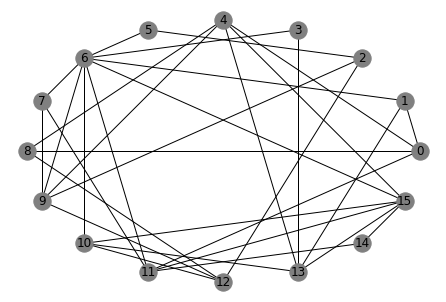

In [5]:
#Parametros de configuracion de la red.
n, k, p = 16, 2, 1
#Modifica la red a partir del algoritmo de Watts - Strogatz
G = nx.watts_strogatz_graph(n, 2*k, p)
nx.draw_circular(G,**opts)
ma = matriz_acoplaminento(G)

print("La matriz de acoplamiento es:")
print(ma)

#Exporta la matriz de acoplamiento a matlab
scipy.io.savemat('c:/Users/Administrador/Documents/1MyStuffs/Master_FIME/TESIS/codigos/osciladores-Matlab/MatAcop.mat', mdict={'arr': ma})
#---------

print("El coeficiente de agrupamiento promedio es:",nx.average_clustering(G))
print("El promedio del camino mas corto es:",nx.average_shortest_path_length(G))

#Calculo de los valores propios de la matriz de acoplamiento
vp = np.linalg.eigvals(ma)
vp = sorted(vp,reverse=True)
print("Los valores propios son:")
print(vp)
print("El valor propio Lamda2 es:")
print(vp[1])
print("El valor propio LamdaN es:")
print(vp[n-1])

#Calculo del metodo eingratio para sincronizabilidad
eingratio = vp[n-1]/vp[1]
print("El valor del eingratio de la red es:")
print(eingratio)




In [21]:
#Red Topologia regular con acopalmiento circular
'''
G_circular = create_network(n,k//2)
nx.draw(G_circular,**opts)
MA = matriz_acoplaminento(G_circular)
#MA = -nx.laplacian_matrix(G_circular).toarray()
print(MA)
lambda2 = lambda2_para_RCaAnillo(n,k)
print(lambda2)


#Calculo de los valores propios de la matriz de acoplamiento
vpropio = np.linalg.eigvals(MA)
vpropio = sorted(vpropio,reverse=True)
print("Los valores propios son:")
print(vpropio)
print("El valor propio Lamda2 es:")
print(vpropio[1])
'''

'\nG_circular = create_network(n,k//2)\nnx.draw(G_circular,**opts)\nMA = matriz_acoplaminento(G_circular)\n#MA = -nx.laplacian_matrix(G_circular).toarray()\nprint(MA)\nlambda2 = lambda2_para_RCaAnillo(n,k)\nprint(lambda2)\n\n\n#Calculo de los valores propios de la matriz de acoplamiento\nvpropio = np.linalg.eigvals(MA)\nvpropio = sorted(vpropio,reverse=True)\nprint("Los valores propios son:")\nprint(vpropio)\nprint("El valor propio Lamda2 es:")\nprint(vpropio[1])\n'